In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('iris.csv',names=['f1','f2','f3','f4','f5'])
df.head()

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# find count of all data unique data in f5 column
df['f5'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: f5, dtype: int64

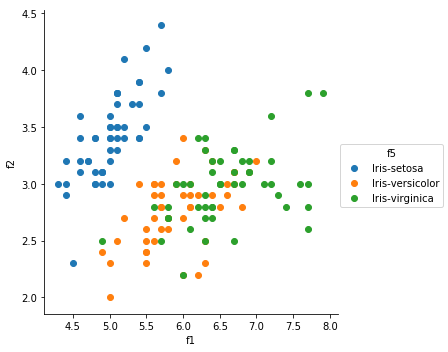

In [9]:
# visualizing with two features
sbn.FacetGrid(df,hue='f5', size=5).map(plt.scatter, 'f1','f2').add_legend()

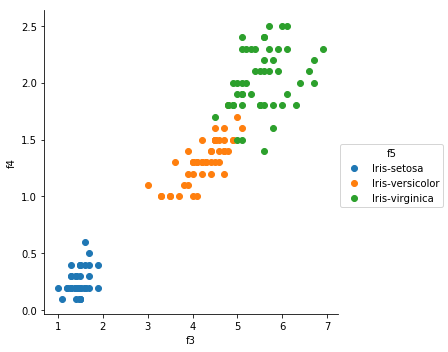

In [14]:
# visualizing with two features
sbn.FacetGrid(df,hue='f5', size=5).map(plt.scatter, 'f3','f4').add_legend()

In [16]:
# one mappping species name with encoding
df['f5'] = df['f5'].map({'Iris-versicolor':[1,0,0],'Iris-setosa':[0,1,0],'Iris-virginica':[0,0,1]})
df.head()

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,"[0, 1, 0]"
1,4.9,3.0,1.4,0.2,"[0, 1, 0]"
2,4.7,3.2,1.3,0.2,"[0, 1, 0]"
3,4.6,3.1,1.5,0.2,"[0, 1, 0]"
4,5.0,3.6,1.4,0.2,"[0, 1, 0]"


In [19]:
# now suffle data for randmization
df = df.iloc[np.random.permutation(len(df))]
df.head()

,f1,f2,f3,f4,f5
130,7.4,2.8,6.1,1.9,"[0, 0, 1]"
5,5.4,3.9,1.7,0.4,"[0, 1, 0]"
9,4.9,3.1,1.5,0.1,"[0, 1, 0]"
22,4.6,3.6,1.0,0.2,"[0, 1, 0]"
148,6.2,3.4,5.4,2.3,"[0, 0, 1]"


In [20]:
# now rest index as it was also suffled
df = df.reset_index(drop=True)
df.head()

,f1,f2,f3,f4,f5
0,7.4,2.8,6.1,1.9,"[0, 0, 1]"
1,5.4,3.9,1.7,0.4,"[0, 1, 0]"
2,4.9,3.1,1.5,0.1,"[0, 1, 0]"
3,4.6,3.6,1.0,0.2,"[0, 1, 0]"
4,6.2,3.4,5.4,2.3,"[0, 0, 1]"


In [152]:
# Now split data into training and testing
#carefully check indexes of dict 
train_x = df.loc[0:105,['f1','f2','f3','f4']] #in pandas df 105 is inclusive
temp=df['f5']
train_y = temp[0:106]

test_x = df.loc[106:149,['f1','f2','f3','f4']]
test_y = temp[106:150]

In [140]:
temp[:1] #return 1 row as :1 the 1 is exclusive

0    [0, 0, 1]
Name: f5, dtype: object

In [141]:
df.loc[0:1,['f1','f2','f3','f4']] # one is inclusive so return 2 row

,f1,f2,f3,f4
0,7.4,2.8,6.1,1.9
1,5.4,3.9,1.7,0.4


# Now Convert it to tensorflow attributes


In [122]:
#placeholders and variables. input has 4 features and output has 3 classes
x=tf.placeholder(tf.float32,shape=[None,4])
y_=tf.placeholder(tf.float32,shape=[None, 3])
#weight and bias
W=tf.Variable(tf.zeros([4,3]))
b=tf.Variable(tf.zeros([3]))

In [123]:
x

<tf.Tensor 'Placeholder_12:0' shape=(?, 4) dtype=float32>

In [124]:
W

<tf.Variable 'Variable_10:0' shape=(4, 3) dtype=float32_ref>

In [125]:
# model 
#softmax function for multiclass classification
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [126]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [127]:
#optimiser -
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [128]:
# calculating accuracy of model
correct_prediction  = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [129]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)
#number of interations
epoch=2000

In [130]:
for step in range(epoch):
    c = sess.run([train_step, cross_entropy], feed_dict={x : train_x, y_:[t for t in train_y.as_matrix()]})
    if step%500 == 0:
        print(c)

[None, 1.0986121]
[None, 0.14091082]
[None, 0.085345805]
[None, 0.066686831]


In [145]:
#random testing at Sn.130
a=df.loc[130,['f1','f2','f3','f4']]
b=a.reshape(1,4)
largest = sess.run(tf.argmax(y,1), feed_dict={x: b})[0]
if largest==0:
    print ("flower is :Iris-setosa")
elif largest==1:
    print ("flower is :Iris-versicolor")
else :
    print ("flower is :Iris-virginica")

flower is :Iris-setosa


C:\Python'\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
sess.run(accuracy, feed_dict={x: test_x, y_:[t for t in test_y.as_matrix()]})

0.97727275